# Business Understanding
#### [10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

**Purpose of the data set**: This crime dataset was supplied by LA County. It is Crime Data from 2010 to 2019 and it uses uniform crime reporting (UCR) created by the FBI to summarize incident info in a repeatable and comparable way to other cities, counties, and states. The LA City Mayor wrote that the **purpose of the data** was for transparency's sake as well as encouraging those outside of the government to be able to use the data for the sake of innovation and solving problems.
[Ref: https://data.lacity.org/]
  
**Data Source**:
The data set used for the purposes of this project is sourced from [LOS ANGELES OPEN DATA](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z).  

**Data Importance**: 
Analyzing Crime data over several years helps identify high-risk populations and demographies and take corrective action **to reduce crime and make the city safer**.

**Mining useful knowledge and measuring effectiveness of prediction algorithm**:  
For this data set we would like to predict the following features:
- Feature A: **Victim's Age**:
    - Victim's Age is a continuous variable and it makes Feature A a regression problem.
    - We will use a **10-fold cross validation** to measure the effectiveness of a good prediction algorithm.
    - Since Feature A is  a regression problem, we will use metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) or Mean Absolute Error Percentage (MAEP) to measure the success of the prediction.  
  
  
- Feature B: **Victim's Age-Group** (*This is a derived variable*):
    - Victim's Age-Group is a discrete/categorical variable and it makes Feature B a classification problem.
    - We will use a **10-fold cross validation** to measure the effectiveness of a good prediction algorithm.
    - Since Feature B is a classification problem, we will use metrics such as Accuracy, Precision Recall, F1 Score, ROC curve or the Area Under the Curve to measure the success of the prediction.
  
  
- Feature C: **Victim's Sex**:
    - Victim's Sex is a discrete/categorical variable and it makes Feature C a classification problem.
    - We will use a **10-fold cross validation** to measure the effectiveness of a good prediction algorithm.
    - Since Feature C is a classification problem, we will use metrics such as Accuracy, Precision Recall, F1 Score, ROC curve or the Area Under the Curve to measure the success of the prediction.

### Import various modules

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import descartes

In [5]:
import plotly.express as px

In [6]:
import matplotlib.pylab as pl
#from plotly.offline import iplot_mpl

In [7]:
import seaborn as sns

In [8]:
import matplotlib as mpl

In [9]:
from matplotlib import cm

In [10]:
import itertools

In [9]:
#pip install geopandas

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

# Data Meaning Type  
#### [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [11]:
# Load the LA Crimes data set into pandas dataframe

df = pd.read_csv("Data/Crime_Data_from_2010_to_2019.csv")

In [11]:
# List the total number of rows and columns in the dataframe

print("Total number of rows in the dataframe: " + str(df.shape[0]))
print("Total number of columns in the dataframe: " + str(df.shape[1]))

Total number of rows in the dataframe: 2115333
Total number of columns in the dataframe: 28


In [12]:
# Displaying the data types of each column/attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Based on the outputs above we have the following observations for the LA Crimes data set:
- Total number of rows in the dataframe are: 2115333
- Total number of columns in the dataframe are: 28
- The data is saved as 3 main categories: 
 - 8 columns with float64 values.
 - 7 columns with int64 values.
 - 13 columns with nominal object values.


**A detailed description of each attribute along with its meaning and data type are displayed in a table below.**  
*[Ref: Description information in the table below is sourced from [LOS ANGELES OPEN DATA](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z).]*  

In [39]:
# Load Data Description file into pandas dataframe
data_desc = pd.read_csv('Data/Data_Description.csv')

from IPython.display import display, HTML

display(HTML(data_desc.to_html()))

,Column_Name,Description,Data_Type
0,DR_NO,"Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 unique digits",int64
1,Date Rptd,Date Crime was Reported in format: MM/DD/YYYY. The date range is between 01/01/2010 and 12/31/2019.,Date & Time
2,DATE OCC,Date Crime Occurred in format: MM/DD/YYYY. The date range is between 01/01/2010 and 12/31/2019.,Date & Time
3,TIME OCC,Time Crime Occurred in 24 hour military time. The time range is between 0001 and 2359.,int64
4,AREA,The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.,int64
5,AREA NAME,"The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.",Object
6,Rpt Dist No,"A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the ""RD"" that it occurred in for statistical comparisons. The range here is between 100 (which is for Area 1 and Dist 00) and 2199 (which is for Area 21 and Dist 99).",int64
7,Part 1-2,No clear description is available about this column. So this column will not be considered for modelling purposes.,int64
8,Crm Cd,Indicates the crime committed. (Same as Crime Code 1). The range is between 110 and 956.,int64
9,Crm Cd Desc,Defines the Crime Code provided.,Object


**Additional details about the data set can be found in the links below**:  

Link to [Modus Operendi codes](https://data.lacity.org/api/views/63jg-8b9z/files/e14442b9-a6b8-4531-83f3-f7ba980b1377?download=true&filename=MO_CODES_Numerical_20191119.pdf)  

Link to [LAPD Reporting Districts](https://geohub.lacity.org/datasets/4398360b1a0242b78904f46b3786ae73_0)

# Data Quality
#### [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

### Exploring the Dataset

In [15]:
# Displaying the first 2 lines of the dataframe

df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962


In [14]:
# Summary of attributes in the dataframe

df.describe().round(2)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2115333.00,2115333.00,2115333.00,2115333.00,2115333.00,2115333.00,2115280.00,710470.00,2115323.00,139402.00,3499.00,104.00,2115333.00,2115333.00
mean,1.479209e+08,1359.86,11.09,1155.07,1.45,507.33,31.76,311.18,371.37,507.16,950.00,972.21,975.11,34.06,-118.31
std,2.887068e+07,647.10,6.01,601.26,0.50,210.63,20.65,211.31,113.47,210.49,125.68,85.52,81.28,0.71,2.44
min,1.208575e+06,1.00,1.00,100.00,1.00,110.00,-9.00,101.00,101.00,110.00,210.00,93.00,421.00,0.00,-118.83
25%,1.214242e+08,930.00,6.00,643.00,1.00,330.00,20.00,102.00,400.00,330.00,998.00,998.00,998.00,34.01,-118.44
50%,1.508087e+08,1430.00,11.00,1189.00,1.00,442.00,32.00,210.00,400.00,442.00,998.00,998.00,998.00,34.06,-118.33
75%,1.715119e+08,1900.00,16.00,1668.00,2.00,626.00,46.00,501.00,400.00,626.00,998.00,998.00,998.00,34.18,-118.28
max,9.102204e+08,2359.00,21.00,2199.00,2.00,956.00,118.00,971.00,516.00,999.00,999.00,999.00,999.00,34.79,0.00


#### Exploring Column: Vict Descent

In [17]:
# Display missing values in the Column "Vict Descent"

print("Missing values in the Column 'Vict Descent' are: " + str(df['Vict Descent'].isnull().sum()))

Missing values in the Column 'Vict Descent' are: 196726


In [18]:
# Display number of victims grouped by their descent
# Descent Code:
# A: Other Asian, B: Black, C: Chinese, D: Cambodian, F: Filipino, G: Guamanian, H: Hispanic/Latin/Mexican, 
# I: American Indian/Alaskan Native, J: Japanese, K: Korean, L: Laotian, O: Other, P: Pacific Islander, 
# S: Samoan, U: Hawaiian, V: Vietnamese, W: White, X: Unknown, Z: Asian Indian

print()
print("Number of victims grouped by their descent are as below:")
df.groupby('Vict Descent').size()


Number of victims grouped by their descent are as below:


Vict Descent
-         3
A     51128
B    335200
C      1063
D        23
F      2558
G        85
H    725576
I       945
J       418
K      9151
L        18
O    203029
P       343
S        31
U       190
V       201
W    510333
X     78176
Z       136
dtype: int64

Based on the outputs above we have the following observations for the 'Vict Descent' column:
- There are 3 records which do not have a valid Descent code. Those records are indicated by a hypen '-'. Choosing Descent Code 'X' (Unknown) for these records would be appropriate.
- There are 196726 records which are blank. These blank records are associated with Crime Code Descriptions such as "THEFT OF IDENTITY", "VEHICLE - STOLEN" etc. Hence, choosing Descent Code 'X' (Unknown) for these blank records would be appropriate.

Based on further analysis by looking at a random selection of records it is concluded that these could have been **data entry errors**. Hence, we can replace those records with Descent Code 'X', which is for Unknown category.

#### Imputation on Column: Vict Descent

In [13]:
# Replace records in the 'Vict Descent' column having '-' with 'X'

df['Vict Descent'] = df['Vict Descent'].replace(to_replace='-',value='X')

In [14]:
# Replace records in the 'Vict Descent' column having blanks with 'X'

df['Vict Descent'].fillna('X', inplace = True) 

#### Post-Imputation on Column: Vict Descent

In [21]:
# Display missing values in the Column "Vict Descent" and also display the number of victims grouped by their descent

print("Missing values in the Column 'Vict Descent' are: " + str(df['Vict Descent'].isnull().sum()))
print()
print("Number of victims grouped by their descent are as below:")
df.groupby('Vict Descent').size()

Missing values in the Column 'Vict Descent' are: 0

Number of victims grouped by their descent are as below:


Vict Descent
A     51128
B    335200
C      1063
D        23
F      2558
G        85
H    725576
I       945
J       418
K      9151
L        18
O    203029
P       343
S        31
U       190
V       201
W    510333
X    274905
Z       136
dtype: int64

As seen in the output above, the Vict Descent category 'X' now has **274905** records. All the data entry errors are now corrected.

#### Exploring Column: Vict Sex

In [22]:
# Display missing values in the Column "Vict Sex"

print("Missing values in the Column 'Vict Sex' are: " + str(df['Vict Sex'].isnull().sum()))

Missing values in the Column 'Vict Sex' are: 196680


In [23]:
# Display number of victims grouped by their Sex
# Sex Code:
# F: Female, M: Male, X: Unknown

print()
print("Number of victims grouped by their Sex are as below:")
df.groupby('Vict Sex').size()


Number of victims grouped by their Sex are as below:


Vict Sex
-         1
F    888881
H        73
M    974525
N        17
X     55156
dtype: int64

Based on the outputs above we have the following observations for the 'Vict Sex' column:
- There are 196680 records which are blank. These blank records are associated with Crime Code Descriptions such as "THEFT OF IDENTITY", "VEHICLE - STOLEN" etc. Hence, choosing Sex Code 'X' (Unknown) for these blank records would be appropriate.
- There is 1 record which does not have a valid Sex code. This record is indicated by a hypen '-'. Choosing Sex Code 'X' (Unknown) for the record would be appropriate.
- There are 73 records with an invalid code 'H' and 17 records with an invalid code 'N'. Choosing Sex Code 'X' (Unknown) for these records would be appropriate.

Based on further analysis by looking at a random selection of records it is concluded that these could have been **data entry errors**. Hence, we can replace those records with Sex Code 'X', which is for Unknown category.

#### Imputation on Column: Vict Sex

In [21]:
# Replace records in the 'Vict Sex' column having '-' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='-',value='X')

In [22]:
# Replace records in the 'Vict Sex' column having 'H' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='H',value='X')

In [23]:
# Replace records in the 'Vict Sex' column having 'N' with 'X'

df['Vict Sex'] = df['Vict Sex'].replace(to_replace='N',value='X')

In [24]:
# Replace records in the 'Vict Sex' column having blanks with 'X'

df['Vict Sex'].fillna('X', inplace = True) 

#### Post-Imputation on Column: Vict Sex

In [28]:
# Display missing values in the Column "Vict Sex" and also display the number of victims grouped by their Sex

print("Missing values in the Column 'Vict Sex' are: " + str(df['Vict Sex'].isnull().sum()))
print()
print("Number of victims grouped by their Sex are as below:")
df.groupby('Vict Sex').size()

Missing values in the Column 'Vict Sex' are: 0

Number of victims grouped by their Sex are as below:


Vict Sex
F    888881
M    974525
X    251927
dtype: int64

As seen in the output above, the Vict Sex category 'X' now has **251927** records. All the data entry errors are now corrected.

#### Exploring Column: Vict Age

In [29]:
# Display missing values in the Column "Vict Age"

print("Missing values in the Column 'Vict Age' are: " + str(df['Vict Age'].isnull().sum()))

Missing values in the Column 'Vict Age' are: 0


In [30]:
# Display number of victims grouped by their Age

print()
print("Number of victims grouped by their Age are as below:")
df.groupby('Vict Age').size()


Number of victims grouped by their Age are as below:


Vict Age
-9        6
-8        9
-7       15
-6       20
-5       27
       ... 
 97     168
 98     118
 99     809
 114      1
 118      1
Length: 110, dtype: int64

In [31]:
# Display number of victims grouped by their Age, where Age value is less than or equal to zero

print()
print("Number of victims grouped by their Age, where Age value is less than or equal to zero, are as below:")
df[df['Vict Age']<=0].groupby('Vict Age').size()


Number of victims grouped by their Age, where Age value is less than or equal to zero, are as below:


Vict Age
-9         6
-8         9
-7        15
-6        20
-5        27
-4        35
-3        84
-2       129
-1       277
 0    369925
dtype: int64

In [32]:
# Display total number of records with invalid age values
# Age values zero and less are considered invalid age values

print()
print("Total number of records with invalid age values are: " + str( df[df['Vict Age']<=0]['Vict Age'].count() ))


Total number of records with invalid age values are: 370527


In [33]:
# Display number of victims grouped by their Age, where Age value is greater than or equal to 100

print()
print("Number of victims grouped by their Age, where Age value is greater than or equal to 100, are as below:")
df[df['Vict Age']>=100].groupby('Vict Age').size()


Number of victims grouped by their Age, where Age value is greater than or equal to 100, are as below:


Vict Age
114    1
118    1
dtype: int64

In [34]:
# Display overall median victim age value

print()
print("Overall median victim age value in this data set is: " + str( df['Vict Age'].median() ))


Overall median victim age value in this data set is: 32.0


In [35]:
# Display median victim age value of children (>0 & <18)

print()
print("Median victim age value of children (>0 & <18) in this data set is: " + 
      str( df[(df['Vict Age']>0) & (df['Vict Age']<18)]['Vict Age'].median() ))


Median victim age value of children (>0 & <18) in this data set is: 14.0


In [36]:
# Display number of records grouped by 'Crime Code Description' categories that 
# contain the word "CHILD" and with invalid age value less than or equal to zero

df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ].groupby('Crm Cd Desc').size()

Crm Cd Desc
CHILD ABANDONMENT                                30
CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT     330
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT         383
CHILD ANNOYING (17YRS & UNDER)                   67
CHILD NEGLECT (SEE 300 W.I.C.)                 1102
CHILD PORNOGRAPHY                                16
CHILD STEALING                                   83
LEWD/LASCIVIOUS ACTS WITH CHILD                   5
dtype: int64

In [38]:
# Display number of records grouped by 'Vict Age' that 
# contain the word "CHILD" and with invalid age value less than or equal to zero

df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ].groupby('Vict Age').size()

Vict Age
-3       2
-2       1
-1       5
 0    2008
dtype: int64

In [39]:
# Display total number of records that contain the word "CHILD" in the Crime Code Desc and 
# have an invalid age value less than or equal to zero

temp = df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ]['Vict Age'].count()
print("Total number of records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero are: " + str(temp))

Total number of records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero are: 2016


Based on the outputs above we have the following observations for the 'Vict Age' column:
- There are zero records which are blank.
- There are 2 records where the age value is greater than 100. These can be considered as **outliers**. Since the number of records associated with these outliers are very small, we have concluded not to perform any imputations on these records.
- There are 370527 records with invalid age values, of which 2016 records contain the word 'CHILD' in the Crime Code Description.
- Overall median victim age value in this data set is: 32.0.
- Median victim age value of children (>0 & <18) in this data set is: 14.0.

Based on further analysis by looking at a random selection of records it is concluded that these invalid age values could have been **data entry errors**.

Hence, we have concluded to perfom imputations as below:
- For the records that contain the word 'CHILD' in the Crime Code Desc and have an invalid age value less than or equal to zero, we would replace the invalid age with the **Median victim age value for children which is 14**.
- For the remaining records that have an invalid age value less than or equal to zero, we would replace the invalid age with the **Overall median victim age value which is 32**.

#### Imputation on Column: Vict Age

In [17]:
# Replace records that contain the word 'CHILD' in the Crime Code Desc and
# have an invalid age value less than or equal to zero, with
# the Median victim age value for children which is 14.
# As seen in the outputs above, for this particular category the invalid age values are [0, -1, -2, -3]

temp = df[ (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ]['Vict Age']
temp = temp.replace(to_replace=[0, -1, -2, -3],value=14)

df.loc[ ( (df['Crm Cd Desc'].str.contains("CHILD")) & (df['Vict Age']<=0) ), 'Vict Age'] = temp

In [18]:
# Now replace the remaining records that have an invalid age value less than or 
# equal to zero, with the Overall median victim age value which is 32.
# As seen in the outputs above, for this particular category the invalid age values
# are [0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

df.loc[ df['Vict Age']<=0, 'Vict Age' ] = 32

#### Post-Imputation on Column: Vict Age

In [12]:
# Display total number of records with invalid age values
# Age values zero and less are considered invalid age values

print()
print("Total number of records with invalid age values are: " + str( df[df['Vict Age']<=0]['Vict Age'].count() ))


Total number of records with invalid age values are: 0


In [13]:
# Display number of victims grouped by their Age

print()
print("Number of victims grouped by their Age are as below:")
df.groupby('Vict Age').size()


Number of victims grouped by their Age are as below:


Vict Age
2      1465
3      1799
4      2095
5      2375
6      2433
       ... 
97      168
98      118
99      809
114       1
118       1
Length: 100, dtype: int64

As seen in the output above, there are now **NO records with invalid age values**.

#### Exploring Columns: 'LAT' and 'LON'

In [8]:
# Display missing values in Columns 'LAT' and 'LON'

print()
print("Missing values in the Column 'LAT' are: " + str(df['LAT'].isnull().sum()))
print("Missing values in the Column 'LON' are: " + str(df['LON'].isnull().sum()))


Missing values in the Column 'LAT' are: 0
Missing values in the Column 'LON' are: 0


In [44]:
# Display records grouped by LAT values

print()
print("Records grouped by Latitude values:")
df.groupby('LAT').size()


Records grouped by Latitude values:


LAT
0.0000     898
33.3427      6
33.7058      3
33.7060     38
33.7062     35
          ... 
34.6648      1
34.6765      1
34.6828      2
34.7060      2
34.7907      1
Length: 5421, dtype: int64

In [45]:
# Display records grouped by LON values

print()
print("Records grouped by Longitude values:")
df.groupby('LON').size()


Records grouped by Longitude values:


LON
-118.8279      1
-118.8276      1
-118.7668      6
-118.6677      5
-118.6673     27
            ... 
-117.7115      1
-117.7100      1
-117.7059      1
-117.6596      1
 0.0000      898
Length: 5091, dtype: int64

In [101]:
# Display mean LAT and LON values

print()
mean_LAT = df['LAT'].mean()
mean_LON = df['LON'].mean()
print( "Mean latitude value in the current data set is: " + str(mean_LAT) )
print( "Mean longitude value in the current data set is: " + str(mean_LON) )


Mean latitude value in the current data set is: 34.063769408189124
Mean longitude value in the current data set is: -118.30882522215776


Based on the outputs above we have the following observations for the 'LAT' and 'LON' columns:
- There are 898 records which have a latitude value of 0.0000.
- There are 898 records which have a longitude value of 0.0000.

According to Google maps, the latitude of Los Angeles, CA, USA is 34.052235, and the longitude is -118.243683. Which indicates that the LAT and LON **values with 0.0000 are invalid**.

Based on further analysis by looking at a random selection of records it is concluded that these invalid values could have been **data entry errors**.

Hence, we have concluded to **replace these invalid values with the 'mean' values**.

#### Imputation on Columns: 'LAT' and 'LON'

In [102]:
# Replace invalid 'LAT' and 'LON' values with their mean values respectively

df.loc[ df['LAT']==0, 'LAT' ] = mean_LAT
df.loc[ df['LON']==0, 'LON' ] = mean_LON

#### Post-Imputation on Columns: 'LAT' and 'LON'

In [26]:
# Display min and max values of 'LAT' and 'LON' columns

print()
print( "Min LAT is: " + str(df['LAT'].min()) + " and " + "Max LAT is: " + str(df['LAT'].max()) )
print( "Min LON is: " + str(df['LON'].min()) + " and " + "Max LON is: " + str(df['LON'].max()) )


Min LAT is: 33.3427 and Max LAT is: 34.7907
Min LON is: -118.8279 and Max LON is: -117.6596


As seen in the output above, there are now **NO records with invalid LAT and LON values**.

#### Exploring Columns: 'AREA' and 'AREA NAME'

In [50]:
# Cosmetic correction
# When exploring the column name for AREA, a trailiing space was found.
# Instead of having the column name as 'AREA' we have 'AREA '
# The code in this cell is to remove the trailing space

df = df.rename(columns = {"AREA ":"AREA"})

In [51]:
# Display records grouped by AREA and their corresponding AREA NAME

print()
print("Records grouped by 'AREA' and their corresponding 'AREA NAME':")
df.groupby(['AREA', 'AREA NAME']).size()


Records grouped by 'AREA' and their corresponding 'AREA NAME':


AREA  AREA NAME  
1     Central         98289
2     Rampart         89576
3     Southwest      135437
4     Hollenbeck      77915
5     Harbor          92007
6     Hollywood       98989
7     Wilshire        88590
8     West LA         89047
9     Van Nuys        99704
10    West Valley     89562
11    Northeast      100252
12    77th Street    145272
13    Newton         100002
14    Pacific        112522
15    N Hollywood    113905
16    Foothill        79855
17    Devonshire      96478
18    Southeast      111457
19    Mission        103568
20    Olympic         95314
21    Topanga         97592
dtype: int64

In [52]:
# Identify missing values in 'AREA' and 'AREA NAME' columns

print()
print( "Missing values in column 'AREA' are: " + str(df['AREA'].isnull().sum()) )
print( "Missing values in column 'AREA NAME' are: " + str(df['AREA NAME'].isnull().sum()) )


Missing values in column 'AREA' are: 0
Missing values in column 'AREA NAME' are: 0


Based on the outputs above we have the following observations for 'AREA' and 'AREA NAME' columns:
- There are NO missing values in these columns.
- There are NO spelling mistakes or any other data entry errors in these columns.
- Each AREA code is correctly mapped to its corresponding AREA NAME.

Hence no modifications would be made to these columns.

#### Exploring Columns: 'Status' and 'Status Desc'

In [53]:
# Identify missing values in 'Status' and 'Status Desc' columns

print()
print( "Missing values in column 'Status' are: " + str(df['Status'].isnull().sum()) )
print( "Missing values in column 'Status Desc' are: " + str(df['Status Desc'].isnull().sum()) )


Missing values in column 'Status' are: 3
Missing values in column 'Status Desc' are: 0


In [54]:
# Display records grouped by 'Status' and their corresponding 'Status Desc'

print()
print("Records grouped by 'Status' and their corresponding 'Status Desc':")
df.groupby(['Status', 'Status Desc']).size()


Records grouped by 'Status' and their corresponding 'Status Desc':


Status  Status Desc 
13      UNK                   1
19      UNK                   1
AA      Adult Arrest     219426
AO      Adult Other      251366
CC      UNK                  29
IC      Invest Cont     1623298
JA      Juv Arrest        15867
JO      Juv Other          5341
TH      UNK                   1
dtype: int64

Based on the outputs above we have the following observations for the 'Status' and 'Status Desc' columns:
- There is one record with Status = 13 and corresponding Description UNK.
- There is one record with Status = 19 and corresponding Description UNK.
- There is one record with Status = TH and corresponding Description UNK.
- There are 29 records with Status = CC and corresponding Description UNK.
- There are 3 blanks in Status column and corresponding Description UNK.

Based on further analysis, by looking at the actual records, we found the following:
- Status Desc 'UNK' meant UNKNOWN.
- The records with status codes 13 and 19 had area codes 13 and 19 respectively.
- Status codes 'TH' and 'CC' did not give a clear indication as to what they meant. However, the Status Desc 'UNK' indicated that these codes were invalid.

Hence, we concluded that these invalid values could have been **data entry errors**. And we would **replace these invalid values with the Status code 'IC' and Status Desc 'Invest Cont' which are the default values for these fields**.

#### Imputation on Columns: 'Status' and 'Status Desc'

In [103]:
# Replace 'UNK' in 'Status Desc' column with 'Invest Cont'

df.loc[ df['Status Desc']=='UNK', 'Status Desc' ] = 'Invest Cont'

In [104]:
# Replace records with status codes '13', '19', 'TH' and 'CC' with 'IC'

df.loc[ df['Status']=='13', 'Status' ] = 'IC'
df.loc[ df['Status']=='19', 'Status' ] = 'IC'
df.loc[ df['Status']=='TH', 'Status' ] = 'IC'
df.loc[ df['Status']=='CC', 'Status' ] = 'IC'

In [105]:
# Replace blanks in 'Status' column with 'IC'

df['Status'].fillna('IC', inplace = True) 

#### Post-Imputation on Columns: 'Status' and 'Status Desc'

In [58]:
# Identify missing values in 'Status' and 'Status Desc' columns

print()
print( "Missing values in column 'Status' are: " + str(df['Status'].isnull().sum()) )
print( "Missing values in column 'Status Desc' are: " + str(df['Status Desc'].isnull().sum()) )


Missing values in column 'Status' are: 0
Missing values in column 'Status Desc' are: 0


In [59]:
# Display records grouped by 'Status' and their corresponding 'Status Desc'

print()
print("Records grouped by 'Status' and their corresponding 'Status Desc':")
df.groupby(['Status', 'Status Desc']).size()


Records grouped by 'Status' and their corresponding 'Status Desc':


Status  Status Desc 
AA      Adult Arrest     219426
AO      Adult Other      251366
IC      Invest Cont     1623333
JA      Juv Arrest        15867
JO      Juv Other          5341
dtype: int64

As seen in the output above, there are now **NO records with invalid 'Status' and 'Status Desc' values**.

#### Exploring Columns: 'Crm Cd' and 'Crm Cd Desc'

In [22]:
# Identify missing values in 'Crm Cd' and 'Crm Cd Desc' columns

print()
print( "Missing values in column 'Crm Cd' are: " + str(df['Crm Cd'].isnull().sum()) )
print( "Missing values in column 'Crm Cd Desc' are: " + str(df['Crm Cd Desc'].isnull().sum()) )


Missing values in column 'Crm Cd' are: 0
Missing values in column 'Crm Cd Desc' are: 0


In [23]:
# Display records grouped by 'Crm Cd' and their corresponding 'Crm Cd Desc'

print()
print("Records grouped by 'Crm Cd' and their corresponding 'Crm Cd Desc':")
df.groupby(['Crm Cd', 'Crm Cd Desc']).size()


Records grouped by 'Crm Cd' and their corresponding 'Crm Cd Desc':


Crm Cd  Crm Cd Desc                                         
110     CRIMINAL HOMICIDE                                        2773
113     MANSLAUGHTER, NEGLIGENT                                     5
121     RAPE, FORCIBLE                                          10327
122     RAPE, ATTEMPTED                                          1109
210     ROBBERY                                                 83854
                                                                ...  
950     DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400         238
951     DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER     2158
952     ABORTION/ILLEGAL                                            7
954     CONTRIBUTING                                              183
956     LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                 21209
Length: 142, dtype: int64

As seen above there are **NO errors** in 'Crm Cd' and 'Crm Cd Desc' columns.

#### Exploring Columns: 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'

In [41]:
# Identify missing values in 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4' columns

print()
print( "Missing values in column 'Crm Cd 1' are: " + str(df['Crm Cd 1'].isnull().sum()) )
print( "Missing values in column 'Crm Cd 2' are: " + str(df['Crm Cd 2'].isnull().sum()) )
print( "Missing values in column 'Crm Cd 3' are: " + str(df['Crm Cd 3'].isnull().sum()) )
print( "Missing values in column 'Crm Cd 4' are: " + str(df['Crm Cd 4'].isnull().sum()) )


Missing values in column 'Crm Cd 1' are: 10
Missing values in column 'Crm Cd 2' are: 1975931
Missing values in column 'Crm Cd 3' are: 2111834
Missing values in column 'Crm Cd 4' are: 2115229


Based on the information we have from data set description, we understand that Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. It is also indicated that value in 'Crm Cd' column is same as the value in 'Crm Cd 1' column.

Based on our analysis above, we know that there are NO missing values in 'Crm Cd' column. Hence, we would analyze the differences in values in each record between 'Crm Cd' and 'Crm Cd 1' columns and update them to be the same.

#### Imputation on Columns: 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'

In [106]:
# Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'

print()
print("Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4':")
print()
df[ ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'] ].info()


Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 4 columns):
Crm Cd 1    float64
Crm Cd 2    float64
Crm Cd 3    float64
Crm Cd 4    float64
dtypes: float64(4)
memory usage: 64.6 MB


In [107]:
# Since the codes are integer values, we want to change the data type to int
# Before changing the data type to int, we fill in -1 as the value for blank values

df['Crm Cd 1'].fillna(-1, inplace = True)
df['Crm Cd 2'].fillna(-1, inplace = True) 
df['Crm Cd 3'].fillna(-1, inplace = True) 
df['Crm Cd 4'].fillna(-1, inplace = True) 

# Now convert the columns to datatype int
df[ ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'] ] = df[ ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'] ].astype(int)

#### Post-Imputation on Columns: 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'

In [26]:
# Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'

print()
print("Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4':")
print()
df[ ['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'] ].info()


Display the data type for columns 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 4 columns):
 #   Column    Dtype
---  ------    -----
 0   Crm Cd 1  int32
 1   Crm Cd 2  int32
 2   Crm Cd 3  int32
 3   Crm Cd 4  int32
dtypes: int32(4)
memory usage: 32.3 MB


In [28]:
# Display the records where the values in 'Crm Cd' and 'Crm Cd 1' columns are different.

df[ (df['Crm Cd']) != (df['Crm Cd 1']) ][ ['Crm Cd', 'Crm Cd Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'] ]

,Crm Cd,Crm Cd Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
1233,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,745,930,-1,-1
4030,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,745,930,-1,-1
4582,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,745,930,-1,-1
6126,820,ORAL COPULATION,230,820,998,-1
6971,753,DISCHARGE FIREARMS/SHOTS FIRED,745,753,998,-1
...,...,...,...,...,...,...
2113451,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,812,821,-1,-1
2114325,761,BRANDISH WEAPON,627,761,-1,-1
2114853,820,ORAL COPULATION,813,820,-1,-1
2114918,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,745,930,-1,-1


As seen in the output above, there are 3632 records where the value in 'Crm Cd' is different than 'Crm Cd 1' but has been used in other columns such as 'Crm Cd 2'. We will assume that there is a valid reason for categorizing Crime Codes in such a way. Hence, NO further modifications would be made to these columns.

#### Exploring Column: Mocodes

In [8]:
# Identify missing values in 'Mocodes'

print()
print( "Missing values in column 'Mocodes' are: " + str(df['Mocodes'].isnull().sum()) )


Missing values in column 'Mocodes' are: 228017


In [11]:
# Display records with missing 'Mocodes'

df[ (df['Mocodes']).isnull() ][ ['Crm Cd', 'Crm Cd Desc', 'Mocodes'] ]

,Crm Cd,Crm Cd Desc,Mocodes
15,946,OTHER MISCELLANEOUS CRIME,NaN
28,946,OTHER MISCELLANEOUS CRIME,NaN
51,946,OTHER MISCELLANEOUS CRIME,NaN
79,647,THROWING OBJECT AT MOVING VEHICLE,NaN
102,510,VEHICLE - STOLEN,NaN
...,...,...,...
2115303,510,VEHICLE - STOLEN,NaN
2115305,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN
2115317,922,CHILD STEALING,NaN
2115325,510,VEHICLE - STOLEN,NaN


As seen in the output above, there are 228017 records with missing 'Mocodes'. We will assume that there is a valid reason for not having Mocodes for these records. Hence, NO further modifications would be made to this columns.

#### Exploring Columns: 'Weapon Used Cd' and 'Weapon Desc'

In [24]:
# Identify missing values in 'Weapon Used Cd' and 'Weapon Desc' columns

print()
print( "Missing values in column 'Weapon Used Cd' are: " + str(df['Weapon Used Cd'].isnull().sum()) )
print( "Missing values in column 'Weapon Desc' are: " + str(df['Weapon Desc'].isnull().sum()) )


Missing values in column 'Weapon Used Cd' are: 1404863
Missing values in column 'Weapon Desc' are: 1404864


In [12]:
# As seen in the output above, there is one record that does not have a 'Weapon Desc' but has a 'Weapon Used Cd'
# Display the one record that does not have a 'Weapon Desc' but has a 'Weapon Used Cd'

print()
print("The one record that does not have a 'Weapon Desc' but has a 'Weapon Used Cd' is:")
df[ (df['Weapon Desc'].isnull()) & (df['Weapon Used Cd'].notnull()) ][['Crm Cd', 'Crm Cd Desc', 'Weapon Used Cd', 'Weapon Desc']]


The one record that does not have a 'Weapon Desc' but has a 'Weapon Used Cd' is:


,Crm Cd,Crm Cd Desc,Weapon Used Cd,Weapon Desc
196259,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",222.0,NaN


In [25]:
# Display records grouped by 'Weapon Used Cd' and their corresponding 'Weapon Desc'

print()
print("Records grouped by 'Weapon Used Cd' and their corresponding 'Weapon Desc':")
df.groupby(['Weapon Used Cd', 'Weapon Desc']).size()


Records grouped by 'Weapon Used Cd' and their corresponding 'Weapon Desc':


Weapon Used Cd  Weapon Desc               
101.0           REVOLVER                       5565
102.0           HAND GUN                      34114
103.0           RIFLE                           867
104.0           SHOTGUN                        1203
105.0           SAWED OFF RIFLE/SHOTGUN         154
                                              ...  
512.0           MACE/PEPPER SPRAY              4034
513.0           STUN GUN                        636
514.0           TIRE IRON                       377
515.0           PHYSICAL PRESENCE              1784
516.0           DOG/ANIMAL (SIC ANIMAL ON)       40
Length: 79, dtype: int64

Based on the outputs above we have the following observations for 'Weapon Used Cd' and 'Weapon Desc' columns:
- There are 1404863 records which do not have a 'Weapon Used Cd'.
- There are 1404864 records which do not have a 'Weapon Desc'.
  
Meaning these 1404863 crimes did not involve any weapon.  

There is one record that does not have a 'Weapon Desc' but has a 'Weapon Used Cd'. Looking closely at the record output it is clear that the crime was committed with a 'DEADLY WEAPON'. So we will conclude that the description of the weapon was not available. Since this is just one record, we will leave the record as is.

#### Exploring Columns: 'Premis Cd' and 'Premis Desc'

In [12]:
# Identify missing values in 'Premis Cd' and 'Premis Desc' columns

print()
print( "Missing values in column 'Premis Cd' are: " + str(df['Premis Cd'].isnull().sum()) )
print( "Missing values in column 'Premis Desc' are: " + str(df['Premis Desc'].isnull().sum()) )


Missing values in column 'Premis Cd' are: 53
Missing values in column 'Premis Desc' are: 187


In [13]:
# Display records grouped by 'Premis Cd' and their corresponding 'Premis Desc'

print()
print("Records grouped by 'Premis Cd' and their corresponding 'Premis Desc':")
df.groupby(['Premis Cd', 'Premis Desc']).size()


Records grouped by 'Premis Cd' and their corresponding 'Premis Desc':


Premis Cd  Premis Desc                       
101.0      STREET                                472827
102.0      SIDEWALK                              105821
103.0      ALLEY                                  13763
104.0      DRIVEWAY                               42544
105.0      PEDESTRIAN OVERCROSSING                  258
                                                  ...  
967.0      MTA - GOLD LINE - CHINATOWN               16
968.0      MTA - GOLD LINE - LINCOLN/CYPRESS         17
969.0      MTA - GOLD LINE - HERITAGE SQ             10
970.0      MTA - GOLD LINE - SOUTHWEST MUSEUM        15
971.0      MTA - GOLD LINE - HIGHLAND PARK           25
Length: 321, dtype: int64

#### Imputation on Columns: 'Premis Cd' and 'Premis Desc'

In [108]:
# Display the data type for column 'Premis Cd'

print()
print("Display the data type for column 'Premis Cd':")
print()
df[ ['Premis Cd'] ].info()


Display the data type for column 'Premis Cd':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 1 columns):
Premis Cd    float64
dtypes: float64(1)
memory usage: 16.1 MB


In [109]:
# Since the codes are integer values, we want to change the data type to int
# Before changing the data type to int, we fill in -1 as the value for blank values

df['Premis Cd'].fillna(-1, inplace = True)

# Now convert the columns to datatype int
df['Premis Cd'] = df['Premis Cd'].astype(int)

#### Post-Imputation on Columns: 'Premis Cd' and 'Premis Desc'

In [16]:
# Display the data type for column 'Premis Cd'

print()
print("Display the data type for column 'Premis Cd':")
print()
df[ ['Premis Cd'] ].info()


Display the data type for column 'Premis Cd':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   Premis Cd  int32
dtypes: int32(1)
memory usage: 8.1 MB


In [17]:
# Display missing values in 'Premis Cd' column

print()
print( "Missing values in column 'Premis Cd' are: " + str(df['Premis Cd'].isnull().sum()) )


Missing values in column 'Premis Cd' are: 0


#### Exploring Columns: 'LOCATION' and 'Cross Street'

In [48]:
# Identify missing values in 'LOCATION' and 'Cross Street' columns

print()
print( "Missing values in column 'LOCATION' are: " + str(df['LOCATION'].isnull().sum()) )
print( "Missing values in column 'Cross Street' are: " + str(df['Cross Street'].isnull().sum()) )


Missing values in column 'LOCATION' are: 0
Missing values in column 'Cross Street' are: 1759943


Based on the outputs above we have the following observations for 'LOCATION' and 'Cross Street' columns
- There are NO missing values in 'LOCATION' column.
- There are 1759943 records which do not have a 'Cross Street'. This could be because there was NO cross street information available or the location information was sufficient to pin point the place of crime occurence.

Hence, we have concluded not to make any modifications to these columns.

#### Exploring Columns: 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Rpt Dist No', 'Part 1-2'

In [20]:
# Identify missing values in 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Rpt Dist No', 'Part 1-2' columns

print()
print( "Missing values in column 'DR_NO' are: " + str(df['DR_NO'].isnull().sum()) )
print( "Missing values in column 'Date Rptd' are: " + str(df['Date Rptd'].isnull().sum()) )
print( "Missing values in column 'DATE OCC' are: " + str(df['DATE OCC'].isnull().sum()) )
print( "Missing values in column 'TIME OCC' are: " + str(df['TIME OCC'].isnull().sum()) )
print( "Missing values in column 'Rpt Dist No' are: " + str(df['Rpt Dist No'].isnull().sum()) )
print( "Missing values in column 'Part 1-2' are: " + str(df['Part 1-2'].isnull().sum()) )


Missing values in column 'DR_NO' are: 0
Missing values in column 'Date Rptd' are: 0
Missing values in column 'DATE OCC' are: 0
Missing values in column 'TIME OCC' are: 0
Missing values in column 'Rpt Dist No' are: 0
Missing values in column 'Part 1-2' are: 0


In [10]:
# Display min and max values from 'TIME OCC' column so as to verify if the time values had an errors

print()
print("Minimum value in 'TIME' column: " + str(df['TIME OCC'].min()) )
print("Maximum value in 'TIME' column: " + str(df['TIME OCC'].max()) )


Minimum value in 'TIME' column: 1
Maximum value in 'TIME' column: 2359


As seen above there are **NO errors** in the TIME OCC column. The time values fall within the range of 0000 till 2359 (Military time). And there are NO missing values in Columns: 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Rpt Dist No', 'Part 1-2'.

### Summary on the missing values

Below is the summary of the observations when validating missing values in each of the columns in the data set:
- Based on various outputs we analyzed in individual sections above, we concluded that all the missing values in this data set are data entry errors.
- In individual sections above, we have provided a detailed explanation on what methods we would use to address the missing values.
- We also have completed imputations on the columns to provide a clean copy of the data which can now directly be used for modelling purposes.

### Find Duplicate rows and columns in the data set

In [9]:
# Identify duplicate rows in the entire data set, using information from all the columns
# The below code marks duplicates as 'True' except for the first occurrence.
# df.duplicated(subset=None, keep='first')

print()
print("Grouping non-duplicates into False bucket and duplicates into True bucket:")
df.groupby( [df.duplicated(subset=None, keep='first')] ).size()


Grouping non-duplicates into False bucket and duplicates into True bucket:


False    2115333
dtype: int64

As seen in the output above, There are **NO duplicate rows** in the current data set.

From the outputs of "df.info()" and "display(HTML(data_desc.to_html()))" given above, we conclude that there are **NO duplicate columns** in the current data set.  

*However, it is important to note that the information in columns "Crm Cd" and "Crm Cd 1" is basically the same. So when building models we would make use of only one of these columns.*

### Find Outliers in the data set

When analyzing each individual column in the data set the only **outliers** we encountered were two individuals with age 114 and 118. The same is graphically represented in the box-plot below.  


*Please refer to section "Exploring Column: Vict Age" for more details.*

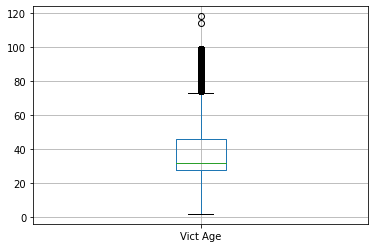

In [15]:
# Box plot to display outliers in the 'Vict Age' column.

df.boxplot(column='Vict Age', return_type='axes');

In [31]:
# Find Missing values in each column

df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228017
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1404863
Weapon Desc       1404864
Status                  0
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1975931
Crm Cd 3          2111834
Crm Cd 4          2115229
LOCATION                0
Cross Street      1759943
LAT                     0
LON                     0
dtype: int64

# Simple Statistics 
#### [10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

In [30]:
# Summary of attributes in the dataframe

df.describe().round(2)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2115333.00,2115333.00,2115333.00,2115333.00,2115333.00,2115333.00,2115280.00,710470.00,2115323.00,139402.00,3499.00,104.00,2115333.00,2115333.00
mean,1.479209e+08,1359.86,11.09,1155.07,1.45,507.33,37.35,311.18,371.37,507.16,950.00,972.21,975.11,34.08,-118.36
std,2.887068e+07,647.10,6.01,601.26,0.50,210.63,14.79,211.31,113.47,210.49,125.68,85.52,81.28,0.12,0.11
min,1.208575e+06,1.00,1.00,100.00,1.00,110.00,2.00,101.00,101.00,110.00,210.00,93.00,421.00,33.34,-118.83
25%,1.214242e+08,930.00,6.00,643.00,1.00,330.00,28.00,102.00,400.00,330.00,998.00,998.00,998.00,34.01,-118.44
50%,1.508087e+08,1430.00,11.00,1189.00,1.00,442.00,32.00,210.00,400.00,442.00,998.00,998.00,998.00,34.06,-118.33
75%,1.715119e+08,1900.00,16.00,1668.00,2.00,626.00,46.00,501.00,400.00,626.00,998.00,998.00,998.00,34.18,-118.28
max,9.102204e+08,2359.00,21.00,2199.00,2.00,956.00,118.00,971.00,516.00,999.00,999.00,999.00,999.00,34.79,-117.66


### Time Crime Occurred

In [113]:
print("The mean time for a crime is around early afternoon at " + str(df['TIME OCC'].mean().round(0)))

The mean time for a crime is around early afternoon at 1360.0


In [115]:
print("The median time for a crime is a little later at " + str(df['TIME OCC'].median()))

The median time for a crime is a little later at 1430.0


In [117]:
print("The range of times contains the full clock cycle between " + str(df['TIME OCC'].min())+ " and " + str(df['TIME OCC'].max()))

The range of times contains the full clock cycle between 1 and 2359


We can see this comes from two separate peaks around the noon hour (1200) and then at 8 PM (2000). It also shows the continuation of late night highs into early morning crime occurrences between 12 AM (0) and 2 AM (200). We will be interested in digging into possible difference in the types of crimes that occurr at these two different peaks. One mid-day, while people tend to be at work. The other during the evening around the time we expect it is getting dark. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19f9cdac8>]],
      dtype=object)

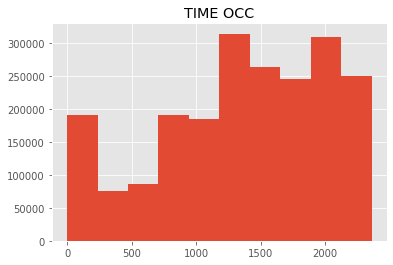

In [95]:
df.hist(column='TIME OCC')

### Victim Age
Victim Age skewed younger and is heavily concentrated around the mid 20s to mid forties.

In [100]:
print("The mean victim age is " + str(df['Vict Age'].mean()))


The mean victim age is 37.35280733577172


In [103]:
print("The median victim age is " + str(df['Vict Age'].median()))

The median victim age is 32.0


In [109]:
print("The range of victim ages is between " + str(df['Vict Age'].min())+ " and " + str(df['Vict Age'].max()))

The range of victim ages is between 2 and 118


This histogram of victims by ages lets us see that there is a right skew to the distribution of ages. Concentrated around the mid 20s to mid 40s. The peak is around the earlier noted mean in the thirties. It is interesting that despite having a large range, there is a heavily skewed focus toward the younger adult population.

Text(0.5, 1.0, 'Victim Counts by Age')

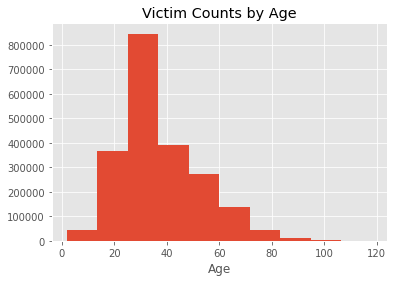

In [79]:
df.hist(column='Vict Age')
plt.xlabel('Age')
plt.title('Victim Counts by Age')

### Area
Crime is reported in every LAPD Division area. However there are really two divisions that pull out ahead of the rest: Southwest and 77th Street. It will be interesting to see if the type of crimes vary in a higher crime district or if it is just volume.


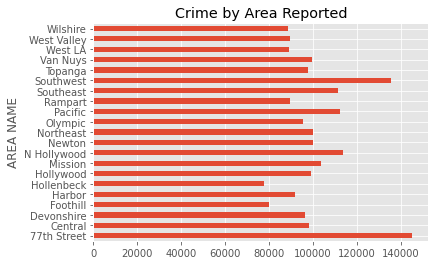

In [122]:
df_area = df.groupby(by=['AREA NAME'])
area_crime_count = df_area['AREA NAME'].count()
area_crime_count.plot.barh(title= 'Crime by Area Reported')

# Visualize Attributes
#### [15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [110]:
# Extracting Year of Crime as an attribute

df['year'] = pd.DatetimeIndex(df['DATE OCC']).year

In [111]:
# Extracting Month of Crime as an attribute

df['month'] = pd.DatetimeIndex(df['DATE OCC']).month_name()

In [112]:
# Extracting Hour of Day as an attribute

df['DayHr'] = pd.cut(df['TIME OCC'],[0,59,159,259,359,459,559,659,759,859,959,1059,1159,1259,1359,1459,1559,1659,1759,1859,1959,2059,2159,2259,2359],24,labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])

In [19]:
# Extracting Age Group as an attribute

df['AgeGroup'] = pd.cut(df['Vict Age'],[1,12,19,35,65,120],5,labels=['PreTeen','Teen','YoungAdult','Adult','Senior'])

##### Attribute 1 : AREA NAME
##### Visualization 1 : Top Crime Areas over last 10 years

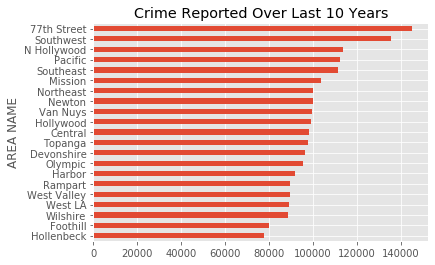

In [114]:
# Reference code : DataMiningNotebooks-master/02. DataVisualization.ipynb

plt.style.use('ggplot')

df_area = df.groupby(by=['AREA NAME'])
area_crime_count = df_area['AREA NAME'].count()
area_crime_count.sort_values().plot.barh(title= 'Crime Reported Over Last 10 Years')

###### Attribute information
1. 'AREA NAME' directly used.
2. 'AREA NAME' attribute identifies which AREAs have most crime, and play a role in modeling, and further interpretation of data

###### Visualization method
1. Bar chart (values sorted) clearly highlights areas with most crime activity

###### Observations
1. Two areas with maximum crime activity are:
  * 77th Street
  * Southwest
2. Variation in crime reports coming from other areas within 1.5x the area that has least reports - Hollenbeck

##### Attribute 2 : Hour of Day ( derived from TIME OCC)
##### Visualization 2 : Number of crime reported per hour of day

Text(0, 0.5, 'Total number of crimes reported')

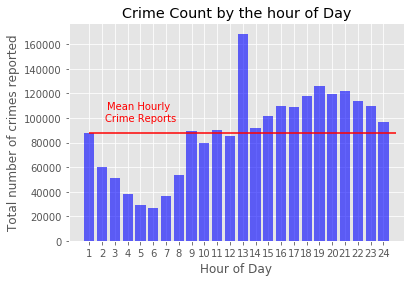

In [115]:
# Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html

df_dayhr_tmp = df.groupby('DayHr').count().reset_index().iloc[:,[0,1]]
df_dayhr = df_dayhr_tmp.rename(columns={df_dayhr_tmp.columns[0]: "HrOfDay", df_dayhr_tmp.columns[1]: "Count"})
df_dayhr
plt.hlines(df_dayhr.Count.mean(),0,24,color="red")
plt.text(4,105000,"Mean Hourly \nCrime Reports",color ="red", horizontalalignment = "center", verticalalignment = "center")
plt.bar(df_dayhr.HrOfDay,df_dayhr.Count,color= "blue", alpha = 0.6)
plt.title('Crime Count by the hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total number of crimes reported')

###### Attribute information
1. 'DayHr' A derived attribute from TIME OCC
2. 'TIME OCC' attribute identifies time of day most crime occurs, and can play a significant role in modeling, and further interpretation of data

###### Visualization method
1. Bar chart (by Hour of Day) identifies clearly time with most and minimum crime activity

###### Observations
1. Peak crime activity occurs in 13th hour of the day, i.e. between noon and 1pm
2. Above average crime occurs from noon to midnight.
3. Lowest crime activity is between 5am and 6am

Text(0.5, 1.0, '% Crime Reports in 4hrs window')

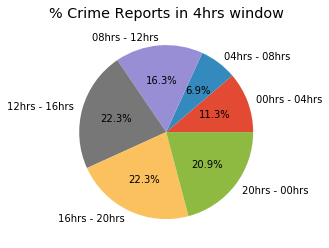

In [11]:
# Reference code
# 1. DataMiningNotebooks-master/02. DataVisualization.ipynb
# 2. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html


df['DayType'] = pd.cut(df['TIME OCC'],[0,359,759,1159,1559,1959,2359],6,labels=['00hrs - 04hrs','04hrs - 08hrs','08hrs - 12hrs','12hrs - 16hrs','16hrs - 20hrs','20hrs - 00hrs'])
df_daytime_tmp = df.groupby('DayType').count().reset_index().iloc[:,[0,1]]
df_daytime = df_daytime_tmp.rename(columns={df_daytime_tmp.columns[0]: "TimeOfDay", df_daytime_tmp.columns[1]: "Count"})
ax1 = plt.pie(df_daytime.Count,labels=df_daytime.TimeOfDay,autopct='%1.1f%%')
plt.title('% Crime Reports in 4hrs window')

###### Attribute information
1. 'HrWindow' A derived attribute from TIME OCC
2. 'TIME OCC' attribute identifies time of day most crime occurs, and can play a significant role in modeling, and further interpretation of data

###### Visualization method
1. Pie chart (by different 4 hour window) clearly identifies which time windows have higher crime as compared to others.
2. Visualization helps provide distribution of aggregrate crime occurances across different time of day. 

###### Observations
1. Highest crime activity between noon and 4pm, and 4pm and 8pm.
2. Lowest crime activity between midnight and 8am.

##### Attribute 3 : Crm Cd and Crm Cd Desc ( crime codes and description of crime)
##### Visualization 4 : Top 10 different crime types

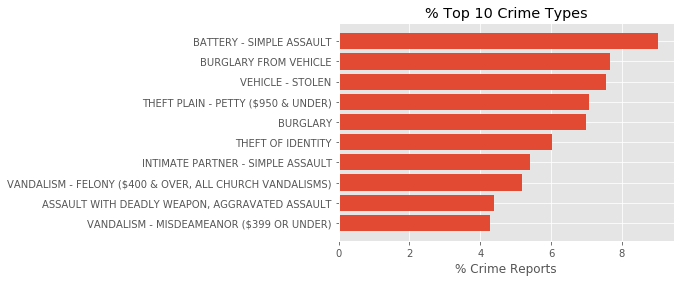

In [12]:
df_crimecode_grp = df.groupby(by=['Crm Cd','Crm Cd Desc']).count().reset_index().iloc[:,[0,1,2]]
df_crimecode = df_crimecode_grp.rename(columns={df_crimecode_grp.columns[0]: "Crime Code", df_crimecode_grp.columns[1]: "Description",df_crimecode_grp.columns[2]: "Count"})
df_crimecode['%']=100*df_crimecode.Count/df_crimecode.Count.sum()
df_crimecode.sort_values(['%'],inplace=True,ascending=False)
df_crimecode['Cum %']=df_crimecode['%'].cumsum()
#plt.bar(df_crimecode.head(10)['Crime Code'].apply(str),df_crimecode.head(10)['%'],align='center')
plt.barh(df_crimecode.head(10)['Description'],df_crimecode.head(10)['%'],align='center')
plt.xlabel('% Crime Reports')
plt.title('% Top 10 Crime Types')
plt.gca().invert_yaxis()

###### Attribute information
1. 'Crm Cd' and 'Crm Cd Desc' 
2. Attribute identifies type of crime, and can play a significant role in modeling, and further interpretation of data

###### Visualization method
1. Bar chart (sorted by maximum % to minimum % ) clearly identifies which type of crimes are dominant.

###### Observations
1. Top three crimes account for 25% of total crimes.
  * Battery - simple assault
  * Burglary from vehicle
  * Vehicle - stolen
2. Two crimes in top three are associated with vehicle
3. Top 10 crimes account for 63.55% of total crimes

##### Attribute 4 : Premis Cd and Premis Desc ( Premis codes and description of premises)
##### Visualization 5 : Top 10 different premises types that account for Crime

Text(0.5, 1.0, '% Top 10 Crime Premises')

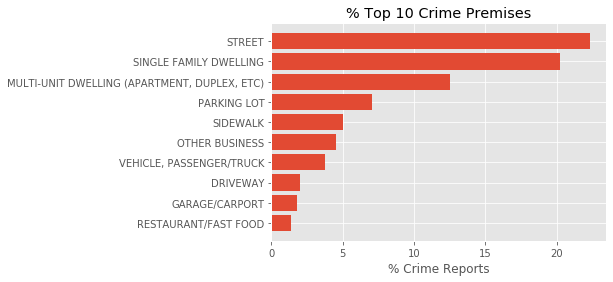

In [13]:
df_premiscode_grp = df.groupby(by=['Premis Cd','Premis Desc']).count().reset_index().iloc[:,[0,1,2]]
df_premiscode = df_premiscode_grp.rename(columns={df_premiscode_grp.columns[0]: "Premis Code", df_premiscode_grp.columns[1]: "Description",df_premiscode_grp.columns[2]: "Count"})
df_premiscode['%']=100*df_premiscode.Count/df_premiscode.Count.sum()
df_premiscode.sort_values(['%'],inplace=True,ascending=False)
df_premiscode['Cum %']=df_premiscode['%'].cumsum()
#plt.bar(df_crimecode.head(10)['Crime Code'].apply(str),df_crimecode.head(10)['%'],align='center')
plt.barh(df_premiscode.head(10)['Description'],df_premiscode.head(10)['%'],align='center')
plt.gca().invert_yaxis()
plt.xlabel('% Crime Reports')
plt.title('% Top 10 Crime Premises')

###### Attribute information
1. 'Premis Cd' and 'Premis Desc' 
2. Attribute identifies different places where crime occurs, and can play a significant role in modeling, and further interpretation of data

###### Visualization method
1. Bar chart (sorted by maximum % to minimum % ) clearly identifies which types of premises have most crime reported.

###### Observations
1. Top three crimes account for 55% of total crimes.
  * Street
  * Single Family Dwelling
  * Multi-unit Dwelling
2. Two crimes in top three are associated with dwelling type - single family, multi-unit
3. Top 10 crimes account for 80.77% of total crimes

##### Attribute 5 : Weapon Used Cd, Weapon Desc ( description of weapon types)
##### Visualization 6: Top 10 different weapons types that get used in Crime

Text(0.5, 1.0, '% Top 10 Weapons used in Crime')

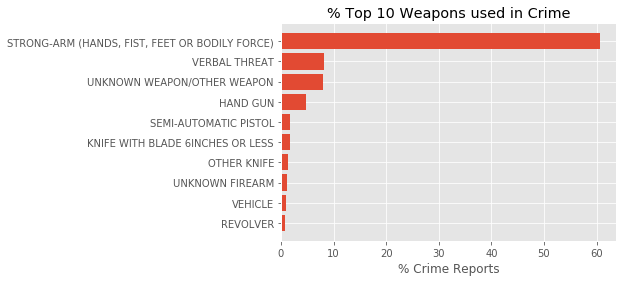

In [118]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html

df_weaponcode_grp = df.groupby(by=['Weapon Used Cd','Weapon Desc']).count().reset_index().iloc[:,[0,1,2]]
df_weaponcode = df_weaponcode_grp.rename(columns={df_weaponcode_grp.columns[0]: "Weapon Code", df_weaponcode_grp.columns[1]: "Description",df_weaponcode_grp.columns[2]: "Count"})
df_weaponcode['%']=100*df_weaponcode.Count/df_weaponcode.Count.sum()
df_weaponcode.sort_values(['%'],inplace=True,ascending=False)
df_weaponcode['Cum %']=df_weaponcode['%'].cumsum()
plt.barh(df_weaponcode.head(10)['Description'],df_weaponcode.head(10)['%'],align='center')
plt.gca().invert_yaxis()
plt.xlabel('% Crime Reports')
plt.title('% Top 10 Weapons used in Crime')

###### Attribute information
1. 'Weapon Used Cd' and 'Weapon Desc' 
2. Attribute identifies different tools or weapons used in crime, and can play a significant role in modeling, and further interpretation of data

###### Visualization method
1. Bar chart (sorted by maximum % to minimum % ) clearly identifies which are the main weapons are used in crime.

###### Observations
1. Strong-arm (hands, first, feet or bodily force) dominates the method or tool with which crime is commited, accounting for 60% of crimes
2. Top three crimes account for 76% of total crimes.
  * Strong-arm
  * Verbal threat
  * Unknown weapon/other weapon
3. Top 10 crimes account for 83.5% of total crimes

Looking at the overall boundaries, it is apparent that crime happens across ages in the tighter city limits at the lower bottom left. 

# Explore Joint Attributes
#### [15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

##### Visualization 1: Understanding Crime distribution across people of different descent for different crime areas

In [15]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html
# 2. Reference code : https://plotly.com/python/treemaps/
df_ad_grp = df.groupby(['AREA NAME', 'Vict Descent']).count().reset_index().iloc[:,[0,1,2]]
df_ad = df_ad_grp.rename(columns={df_ad_grp.columns[0]: "Area", df_ad_grp.columns[1]: "Descent", df_ad_grp.columns[2]: "Count"})
fig = px.treemap(df_ad, path=['Area', 'Descent'],values='Count')
fig.update_layout(title="Crime Area & Victim Descent Treemap",width=800, height=500,title_x=0.5)
fig.show()

###### Attribute information
1. AREA NAME', 'Vict Descent' are used.

###### Visualization method
1. Treemap is used to highlight by crime area, people of which descent are most affected by crime

###### Observations
1. Black (B) crimes dominated : 77th Street, Southwest, Southeast
2. White (W) crimes dominated : N Hollywood, Pacific, Hollywood, Van Nuys, Topanga, West LA, West Valley, Devonshire, Wilshire
3. Hispanics (H) crimes dominated: Central, Mission, Olympic, Newton, Rampart, Harbour, Northeast, Foothill, Hollenbeck

The data should be reviewed ideally in context of actual demographics in the area, to see if a particular community tends to get targeted disportionately to their population in an area. Such demographic data is not part of current work, and could be considered to be added in future for additional inference.

##### Visualization 2: Understanding how the crime has changed over last 10 years in different areas

Text(0.5, 1.0, 'LA Crime Over 10 Years \n (Different Policing Areas)')

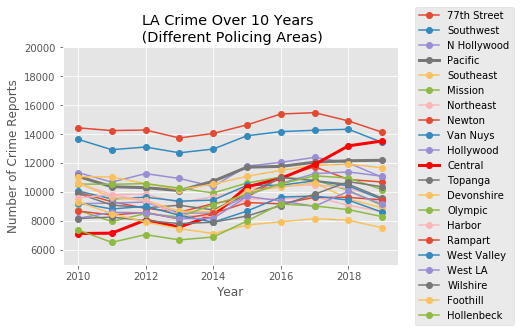

In [124]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html

df_area_yr_grp = df.groupby(by=['AREA NAME','year']).count().reset_index().iloc[:,[0,1,2]]
df_area_yr = df_area_yr_grp.rename(columns={df_area_yr_grp.columns[0]: "Area", df_area_yr_grp.columns[1]: "Year",df_area_yr_grp.columns[2]: "Count"})
df_area_yr_pivot = df_area_yr.pivot(index='Area', columns='Year', values='Count').transpose()
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['77th Street'],marker='o',label= '77th Street')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Southwest'],marker='o',label= 'Southwest')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['N Hollywood'],marker='o',label= 'N Hollywood')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Pacific'],marker='o',label= 'Pacific',linewidth=3)
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Southeast'],marker='o',label= 'Southeast')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Mission'],marker='o',label= 'Mission')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Northeast'],marker='o',label= 'Northeast')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Newton'],marker='o',label= 'Newton')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Van Nuys'],marker='o',label= 'Van Nuys')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Hollywood'],marker='o',label= 'Hollywood')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Central'],marker='o',label= 'Central',linewidth=3, color ='red')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Topanga'],marker='o',label= 'Topanga')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Devonshire'],marker='o',label= 'Devonshire')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Olympic'],marker='o',label= 'Olympic')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Harbor'],marker='o',label= 'Harbor')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Rampart'],marker='o',label= 'Rampart')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['West Valley'],marker='o',label= 'West Valley')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['West LA'],marker='o',label= 'West LA')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Wilshire'],marker='o',label= 'Wilshire')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Foothill'],marker='o',label= 'Foothill')
plt.plot( df_area_yr_pivot.index.values,df_area_yr_pivot['Hollenbeck'],marker='o',label= 'Hollenbeck')
plt.ylim(5000,20000)
plt.legend(loc='lower center',bbox_to_anchor=(1.2, -0.3))
plt.xlabel('Year')
plt.ylabel('Number of Crime Reports')
plt.title('LA Crime Over 10 Years \n (Different Policing Areas)')

###### Attribute information
1. AREA NAME', 'year' are used.
2. 'year' is a derived attribute from 'TIME OCC'.

###### Visualization method
1. line chart is used to highlight (by crime area) how the crime has increased or decreased over last 10 years.

###### Observations

1. Broadly the crime first reduced from 2010 to 2013, and followed by increasing till 2017, and has dipped since then.
2. Two notable exceptions are:
  * Central area, however, has seen continuous increase of crime from 2013 until 2019, and stands out.
  * Topanga area has seen crime rate hold steady since 2017.

In below visualizations, additional attributes are investigated for Central Area to explore what's driving increase in crime?

##### Understanding what's driving increase in central area crime?
##### Visualization 2.a: Are there particular types of crime that are cause for the increase? 

Text(0.5, 1.0, 'Increasing Crime Types in Central Area')

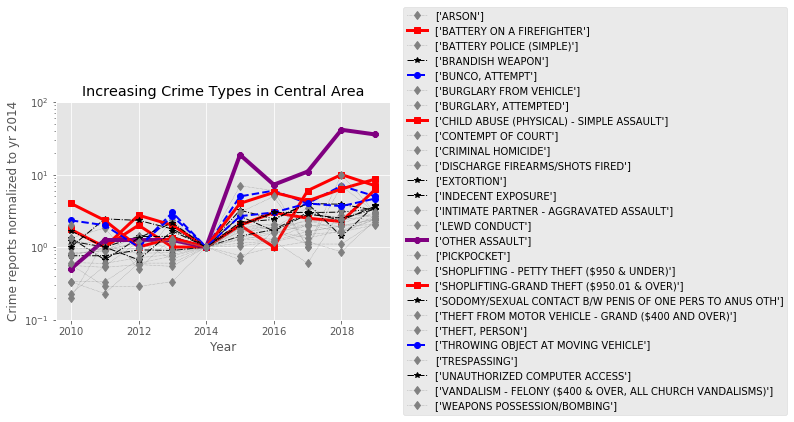

In [125]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html
# 2. Reference code : https://stackoverflow.com/questions/26355313/plotting-multiple-plots-generated-inside-a-for-loop-on-the-same-axes-python

df_cent_crcd_yr_grp = df.loc[df['AREA NAME'] == 'Central'].groupby(by=['Crm Cd','Crm Cd Desc', 'year']).count().reset_index().iloc[:,[0,1,2,3]]
df_sex_yr_grp = df.groupby(by=['Vict Sex','year']).count().reset_index().iloc[:,[0,1,2]]
df_cent_crcd_yr = df_cent_crcd_yr_grp.rename(columns={df_cent_crcd_yr_grp.columns[0]: "CrimeCode", df_cent_crcd_yr_grp.columns[1]: "Description",df_cent_crcd_yr_grp.columns[2]: "Year",df_cent_crcd_yr_grp.columns[3]: "Count"})
df_cent_crcd_yr_pivot = df_cent_crcd_yr.pivot(index='Description', columns='Year', values='Count').transpose()
for (columnName, columnData) in df_cent_crcd_yr_pivot.iteritems():
    incThresh = float(columnData.values[9])/float(columnData.values[4])
    if (incThresh > 10):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='8',label= [str(columnName)],linewidth=4,color='purple')
    if (incThresh > 5 and (incThresh <= 10)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='s',label= [str(columnName)],linewidth=3,color='red')
    if ((incThresh > 4) and (incThresh <= 5)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='o',label= [str(columnName)],linewidth=2,linestyle='--',color='blue')
    if ((incThresh > 3) and (incThresh <= 4)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='*',label= [str(columnName)],linewidth=1,linestyle='-.',color='black')
    if ((incThresh > 2) and (incThresh <= 3)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='d',label= [str(columnName)],linewidth=0.5,linestyle=':',color='grey')
            
plt.ylim(0.1,100)
plt.yscale('log')
plt.legend(loc='right',bbox_to_anchor=(2.2,0.5))
plt.xlabel('Year')
plt.ylabel('Crime reports normalized to yr 2014')
plt.title('Increasing Crime Types in Central Area')

Text(0.5, 1.0, 'Increasing Crime Types in Central Area')

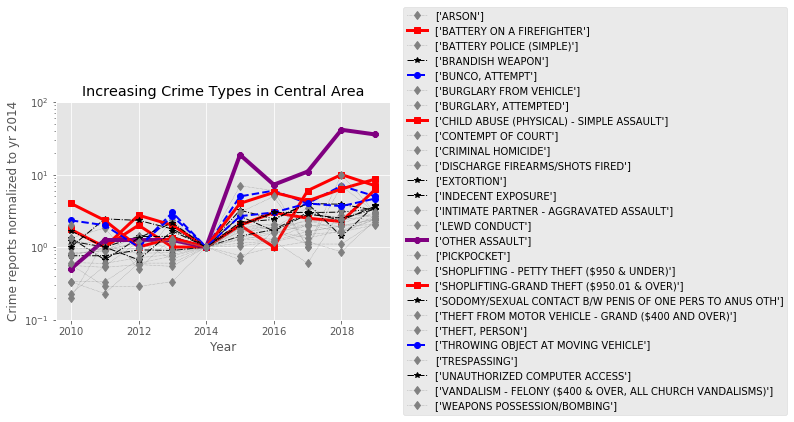

In [22]:
df_cent_crcd_yr_grp = df.loc[df['AREA NAME'] == 'Central'].groupby(by=['Crm Cd','Crm Cd Desc', 'year']).count().reset_index().iloc[:,[0,1,2,3]]
df_sex_yr_grp = df.groupby(by=['Vict Sex','year']).count().reset_index().iloc[:,[0,1,2]]
df_cent_crcd_yr = df_cent_crcd_yr_grp.rename(columns={df_cent_crcd_yr_grp.columns[0]: "CrimeCode", df_cent_crcd_yr_grp.columns[1]: "Description",df_cent_crcd_yr_grp.columns[2]: "Year",df_cent_crcd_yr_grp.columns[3]: "Count"})
df_cent_crcd_yr_pivot = df_cent_crcd_yr.pivot(index='Description', columns='Year', values='Count').transpose()
for (columnName, columnData) in df_cent_crcd_yr_pivot.iteritems():
    incThresh = float(columnData.values[9])/float(columnData.values[4])
    if (incThresh > 10):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='8',label= [str(columnName)],linewidth=4,color='purple')
    if (incThresh > 5 and (incThresh <= 10)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='s',label= [str(columnName)],linewidth=3,color='red')
    if ((incThresh > 4) and (incThresh <= 5)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='o',label= [str(columnName)],linewidth=2,linestyle='--',color='blue')
    if ((incThresh > 3) and (incThresh <= 4)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='*',label= [str(columnName)],linewidth=1,linestyle='-.',color='black')
    if ((incThresh > 2) and (incThresh <= 3)):
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker='d',label= [str(columnName)],linewidth=0.5,linestyle=':',color='grey')
            
plt.ylim(0.1,100)
plt.yscale('log')
plt.legend(loc='right',bbox_to_anchor=(2.2,0.5))
plt.xlabel('Year')
plt.ylabel('Crime reports normalized to yr 2014')
plt.title('Increasing Crime Types in Central Area')

###### Attribute information
1. Attributes used : 'AREA NAME', 'Cr Cd', 'Cr Cd Desc', 'year' are used.
2. 'AREA NAME = Central' used for indexing.
3. Crime Code, and Crime Code Description are assessing type of crime that's cause of increase.
4. 'year' is a derived attribute from 'TIME OCC'.

###### Visualization method
1. line chart is used to highlight (for Central Area) how the crime has increased or decreased over last 10 years for different crime types
2. Y-axis is crime report count normalized to year 2014, to selectively highlight crimes that have shown increase by
  * increase >10X : purple, bold line
  * 5X< increase <10X : red, bold line
  * 4X< increase <5X : blue, bold line
  * <3X is grey dotted lines
  * etc.

###### Observations

1. The biggest increase in crime (>10X) is coming from crime type categorized as 'other assault'
  * This is an area police dept. can work on to identify, and classify crime to able to come up with a plan to address it. 
2. Following types of crime has seen increased >5X but less than 10X
  * Battery on firefighter
  * Child abuse (physical) - simple assault
  * Shop lifting - grand theft (950.01 dollars or more)
3. Following types of crime has seen increased >4X but less than 5X
  * Bunco, attempt
  * Throwing object at moving vehicle

##### Understanding what's driving increase in central area crime?
##### Visualization 2.b: Are crimes on particular people of descent that are cause for the increase? 

Text(0.5, 1.0, 'Increasing Crime Types \n Central Area by Victim Descent')

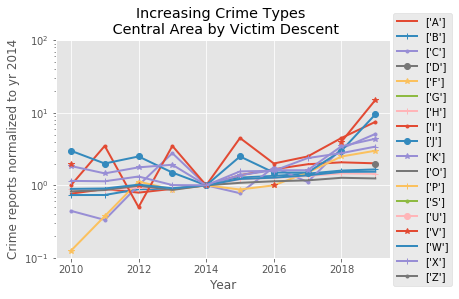

In [126]:
# Reference code : https://stackoverflow.com/questions/13091649/unique-plot-marker-for-each-plot-in-matplotlib/41035147
# Reference code : https://stackoverflow.com/questions/5237611/itertools-cycle-next

colorv=cm.rainbow(np.linspace(0,1,19))
icolor = 1
marker = itertools.cycle((',', '+', '.', 'o', '*')) 

df_cent_des_yr_grp = df.loc[df['AREA NAME'] == 'Central'].groupby(by=['Vict Descent','year']).count().reset_index().iloc[:,[0,1,2]]
df_cent_des_yr = df_cent_des_yr_grp.rename(columns={df_cent_des_yr_grp.columns[0]: "VictDesc", df_cent_des_yr_grp.columns[1]: "Year",df_cent_des_yr_grp.columns[2]: "Count"})
df_cent_des_yr_pivot = df_cent_des_yr.pivot(index='VictDesc', columns='Year', values='Count').transpose()
for (columnName, columnData) in df_cent_des_yr_pivot.iteritems():
        plt.plot( df_cent_crcd_yr_pivot.index.values,columnData.values/columnData.values[4],marker=next(marker),label= [str(columnName)],linewidth=2)
        icolor = icolor+1
plt.ylim(0.1,100)
plt.yscale('log')
plt.legend(loc='right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Crime reports normalized to yr 2014')
plt.title('Increasing Crime Types \n Central Area by Victim Descent')

###### Attribute information
1. Attributes used : 'AREA NAME', 'Vict Descent', 'year' are used.
2. 'AREA NAME = Central' used for indexing.
3. Victim descent is used to assess if people of certain origin are driving the increase.
4. 'year' is a derived attribute from 'TIME OCC'.


###### Visualization method
1. line chart is used to highlight (for Central Area) how the crime has increased for people of different descent
2. Y-axis is crime report count normalized to year 2014, to selectively highlight crimes that have shown increase 

###### Observations

1. Biggest increase is seen for following categories:
  * K, C    :  People of Korean, Chinese descent.
  * X       :  People of unknown descent.
  * I, A, V :  People of American Indian, Other asian, Vietnamese 
  * F       :  People of filipino descent
2. Notably, following populations do not see signfcant increase
  * B       :  Blacks
  * White   :  White

##### Visualization 3: How are the crimes distributed over different months, and last 10 years

Text(0.5, 1, 'LA Crime Heat Map \n Month x Year')

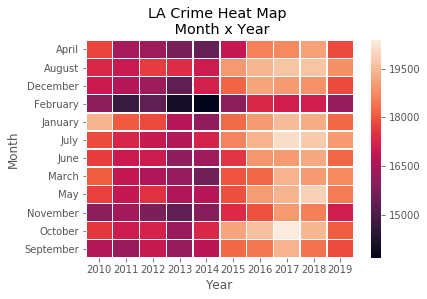

In [127]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html
# 2. Reference code : DataMiningNotebooks-master/02. DataVisualization.ipynb

df_yr_month_grp = df.groupby(['year', 'month']).count().reset_index().iloc[:,[0,1,2]]
df_yr_month = df_yr_month_grp.rename(columns={df_yr_month_grp.columns[0]: "Year", df_yr_month_grp.columns[1]: "Month", df_yr_month_grp.columns[2]: "Count"})

ax = sns.heatmap(df_yr_month.pivot(index='Month', columns='Year', values='Count'),  linewidths=.5)
ax.set_title('LA Crime Heat Map \n Month x Year')

###### Attribute information
1. Attributes used : 'year', 'month'
2. 'year' and 'month' are derived attribute from 'TIME OCC'.


###### Visualization method
1. heatmap used to give a quick bird eye view of months, year that have seen high number of crimes.

###### Observations

1. For all the months, crimes have broadly increased (2014 to 2018) and show tendency to reduce more recently (2018-2019).
2. For all the years, month of February shows smallest crime! 
3. For all the years, month of November shows crime slighly larger than February.
4. For all the years, month of July, Aug, Sept, Oct appear to have worse crime.
5. In year 2010, January stood out as worse for crime (and not February). This may be studied seperately for a cause.

## LA City Crime Mapped over City Boundaries

This was largely developed using a Geopandas tutorial found on [Towards Datascience] (https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972) and using shape data of the City Boundaries from [LA City Geo Hub](https://geohub.lacity.org/datasets/7835077624374b9fa65676443ba7a578_19). These shape files consist of many points and give the background of our map. This allows us to take the geolocational data and overlay it on a map of the LA City Boundaries.

In [82]:
#create a geopandas dataframe and convert lat/long to point geometry:
geometry = [Point(xy) for xy in zip(df["LON"], df["LAT"])]
geometry[:3]

In [93]:
#Tell it that we are using Lat/Long as our coordinates system
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, geometry = geometry)


This shape file from the LA City Geohub allows us to create a map of LA to plot the locational Longitude/Latitude coordinates 

In [88]:
#Read in the Shape file to create a general outline of the LA City Boundaries
la_map = gpd.read_file('Data/shape/City_Boundaries.shp')

/Users/juliacodes/Documents/GitHub/MSDS-ML1-VisualizationAndDataProcessing/lacrime-env/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



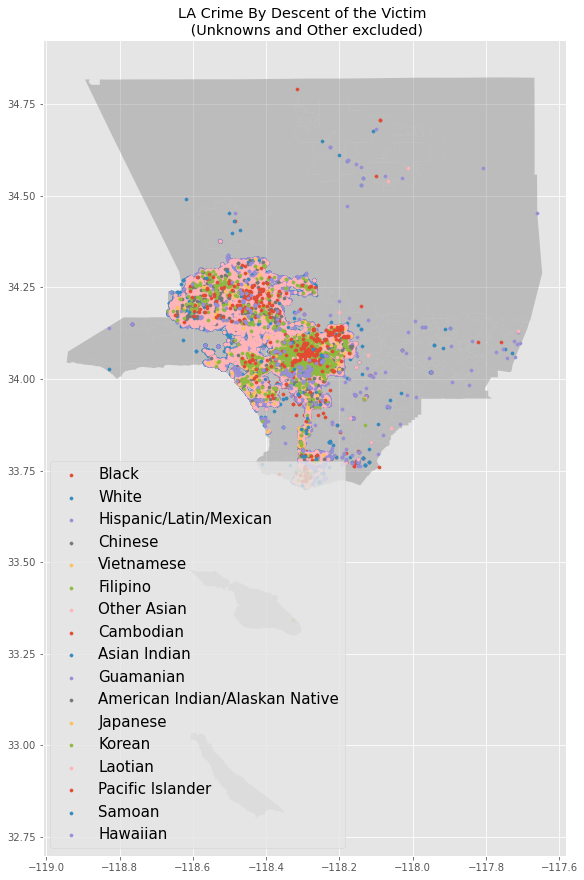

In [92]:
#Finally we are able to plot the data on the map
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
#starting with the largest group and decreasing to limit as much overlay as possible
geo_df[geo_df['Vict Descent']=='B'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Black')
geo_df[geo_df['Vict Descent']=='W'].plot(ax = ax, markersize = 10, marker = 'o', label = 'White')
geo_df[geo_df['Vict Descent']=='H'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Hispanic/Latin/Mexican')
geo_df[geo_df['Vict Descent']=='C'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Chinese')
geo_df[geo_df['Vict Descent']=='V'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Vietnamese')
geo_df[geo_df['Vict Descent']=='F'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Filipino')
geo_df[(geo_df['Vict Descent']=='A')].plot(ax = ax, markersize = 10, marker = 'o', label = 'Other Asian')
geo_df[geo_df['Vict Descent']=='D'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Cambodian')
geo_df[geo_df['Vict Descent']=='Z'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Asian Indian')
geo_df[geo_df['Vict Descent']=='G'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Guamanian')
geo_df[geo_df['Vict Descent']=='I'].plot(ax = ax, markersize = 10, marker = 'o', label = 'American Indian/Alaskan Native')
geo_df[geo_df['Vict Descent']=='J'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Japanese')
geo_df[geo_df['Vict Descent']=='K'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Korean')
geo_df[geo_df['Vict Descent']=='L'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Laotian')
geo_df[geo_df['Vict Descent']=='P'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Pacific Islander')
geo_df[geo_df['Vict Descent']=='S'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Samoan')
geo_df[geo_df['Vict Descent']=='U'].plot(ax = ax, markersize = 10, marker = 'o', label = 'Hawaiian')

plt.title('LA Crime By Descent of the Victim \n (Unknowns and Other excluded)')
plt.legend(prop={'size':15})

#Descent of the Victim (Code): A - Other Asian | B - Black | C - Chinese | D - Cambodian 
#    | F - Filipino | G - Guamanian | H - Hispanic/Latin/Mexican | I - American Indian/Alaskan Native 

#    | J - Japanese | K - Korean | L - Laotian | O - Other | P - Pacific Islander | S - Samoan 
#    | U - Hawaiian | V - Vietnamese | 
#W - White | X - Unknown | Z - Asian Indian

# Explore Attributes and Class
#### [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).


##### Visualization 1: Crime count for Male, Females (Victim Sex)  over last 10 years.

Text(0.5, 1.0, 'LA Crime Over 10 Years \n (Males Vs Females)')

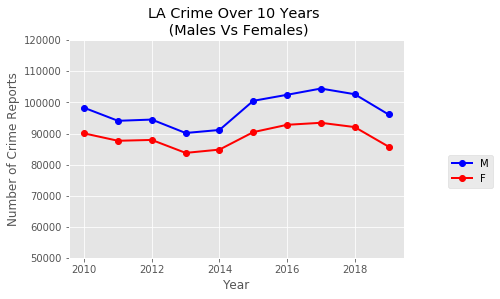

In [128]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html

df_sex_yr_grp = df.groupby(by=['Vict Sex','year']).count().reset_index().iloc[:,[0,1,2]]
df_sex_yr = df_sex_yr_grp.rename(columns={df_sex_yr_grp.columns[0]: "Sex", df_sex_yr_grp.columns[1]: "Year",df_sex_yr_grp.columns[2]: "Count"})
df_sex_yr_pivot = df_sex_yr.pivot(index='Sex', columns='Year', values='Count').transpose()
plt.plot( df_sex_yr_pivot.index.values,df_sex_yr_pivot['M'],marker='o',label= 'M',linewidth=2,color="blue")
plt.plot( df_sex_yr_pivot.index.values,df_sex_yr_pivot['F'],marker='o',label= 'F',linewidth=2,color="red")
plt.ylim(50000,120000)
plt.legend(loc='lower center',bbox_to_anchor=(1.2,0.3))
plt.xlabel('Year')
plt.ylabel('Number of Crime Reports')
plt.title('LA Crime Over 10 Years \n (Males Vs Females)')

###### Attribute information
1. Attributes used : 'Vict Sex', 'year'
2. 'year' is derived attribute from 'TIME OCC'.


###### Visualization method
1. Line chart used to understand crime count differences based on Victim Sex for different years.

###### Observations

1. Male victims are larger than female victim for all the years.
2. Both victim categories follow same trend over the years, and their increase and decrease trend is similar.

##### Visualization 2: Crime count for Male, Females (Victim Sex)  vs Hour of the day

Text(0.5, 1.0, 'Crime Reports over Hour of Day \n (Males Vs Females)')

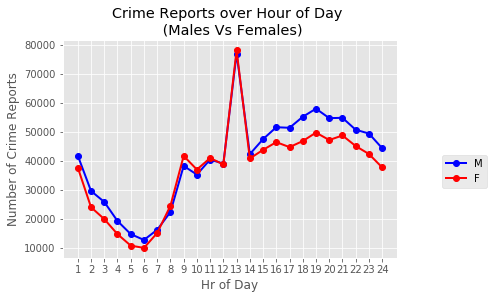

In [129]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html

df_sex_hr_grp = df.groupby(by=['Vict Sex','DayHr']).count().reset_index().iloc[:,[0,1,2]]
df_sex_hr = df_sex_hr_grp.rename(columns={df_sex_hr_grp.columns[0]: "Sex", df_sex_hr_grp.columns[1]: "DayHr",df_sex_hr_grp.columns[2]: "Count"})
df_sex_hr_pivot = df_sex_hr.pivot(index='Sex', columns='DayHr', values='Count').transpose()
#df_sex_hr_pivot
plt.plot( np.array(df_sex_hr_pivot.index.values),df_sex_hr_pivot['M'],marker='o',label= 'M',linewidth=2,color="blue")
plt.plot( np.array(df_sex_hr_pivot.index.values),df_sex_hr_pivot['F'],marker='o',label= 'F',linewidth=2,color="red")
#plt.ylim(50000,120000)
plt.legend(loc='lower center',bbox_to_anchor=(1.2,0.3))
plt.xlabel('Hr of Day')
plt.ylabel('Number of Crime Reports')
plt.title('Crime Reports over Hour of Day \n (Males Vs Females)')

###### Attribute information
1. Attributes used : 'Vict Sex', 'DayHr'
2. 'DayHr' is derived attribute from 'TIME OCC'.


###### Visualization method
1. Line chart used to understand crime count differences based on Victim Sex for different hours of the day.

###### Observations

1. Male victims are larger than female victim from midnight to 7am, and from 2pm to midnight.
2. Male and female crimes appear about same from noon to 2pm.
3. Female victims outnumber male victims from 8am to noon.

##### Visualization 3: Crime Area and Victim Sex joint distribution and trend using Treemap

In [25]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html
# 2. Reference code : https://plotly.com/python/treemaps/

df_as_grp = df.groupby(['AREA NAME', 'Vict Sex']).count().reset_index().iloc[:,[0,1,2]]
df_as = df_as_grp.rename(columns={df_as_grp.columns[0]: "Area", df_as_grp.columns[1]: "Victim Sex", df_as_grp.columns[2]: "Count"})
fig = px.treemap(df_as, path=['Area', 'Victim Sex'],values='Count')
fig.update_layout(title="Crime Area & Victim Sex Treemap",width=800, height=500,title_x=0.5)
fig.show()

###### Attribute information
1. Attributes used : 'Vict Sex', 'AREA NAME'

###### Visualization method
1. Treemap used to quickly identify AREAs that have larger males as victims, or those that have larger females as victims.

###### Observations

1. Male victims are larger in following ares: 
  * 77th Street, Southwest, Van Nuys, West valley, Wilshire, Pacific, Hollywood, Topanga, Northeast, Devonshire
2. Female victims are larger in following areas:
  * N Hollywood, Central, Hollenbeck, Southeast
3. Male and Female victim are about equal in following ares:
  * Mission, West LA, Harbor,Rampart, Foothill, Newton, Olympic 

##### Visualization 4: Crime Area and Victim Age Group joint distribution and trend using Treemap

In [20]:
# Reference code
# 1. Reference code : https://pandas-docs.github.io/pandas-docs-travis/user_guide/groupby.html
# 2. Reference code : https://plotly.com/python/treemaps/

df_aa_grp = df.groupby(['AREA NAME', 'AgeGroup']).count().reset_index().iloc[:,[0,1,2]]
df_aa = df_aa_grp.rename(columns={df_aa_grp.columns[0]: "Area", df_aa_grp.columns[1]: "Victim Age Group", df_aa_grp.columns[2]: "Count"})
fig = px.treemap(df_aa, path=['Area', 'Victim Age Group'],values='Count')
fig.update_layout(title="Crime Area & Victim Age Group Treemap",width=800, height=500,title_x=0.5)
fig.show()

###### Attribute information
1. Attributes used : 'Vict Sex', 'Age Group'
2. Age Group is a derived attribute

###### Visualization method
1. Treemap used to quickly identify AREAs with dominant victim age group.

###### Observations
Adult and Young Adult dominate top two crime age groups in all areas.
The third spot is either taken by crimes on teens or senior citizens are mentioned below.
1. Young adult victims are larger as compared to adults in following ares: 
  * Southwest, Southeast, Hollywood, Newton, Olympic, West Valley, Harbor
2. Adult victims are larger as compared to young adults in following ares: 
  * 77th Street, North Hollywood, Pacific, Topanga,Central, West LA, Northeast, Rampart, Devonshire, Wilshire, Foothill, Hollenbeck
3. Adults and young adults victim are appearing about equal in following ares:
  * Mission, Van Nuys
4. Following areas have Teens crime higher than Senior citizens. Rest have Senior crime count higher than teens.
  * Southwest, Southeast,77th Street, Mission, Newton, Rampart,Foothill, Hollenbeck

##### Visualization 4: Victim Age distribution as a function of hour of day

Text(0.5, 0, 'Hour of the Day')

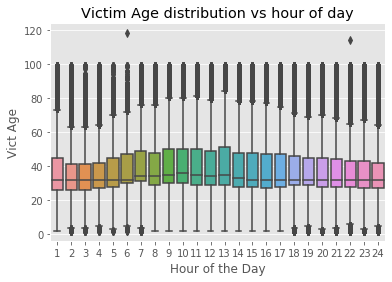

In [132]:
# Reference code : https://seaborn.pydata.org/examples/grouped_boxplot.html

sns.boxplot(x="DayHr", y="Vict Age",data=df)
plt.title('Victim Age distribution vs hour of day')
plt.xlabel('Hour of the Day')

###### Attribute information
1. Attributes used : 'DayHr', 'Victim Age'
2. 'DayHr' is a derived attribute

###### Visualization method
1. Box plot is used, as it provides better representation than line or scatter plot.
2. There is a ditribution of ages present at every hour, and scatter plot, etc just don't provide visual insight into it.

###### Observations
1. Median age is higher from 8am to 5pm, which could tie to more working people being out and susceptible to crime.
2. Interquartile distance is also larger between 8am to 5pm, suggesting that more people of different age groups are being victim of crime, which ties to more age groups being active and susceptible during that time.

##### Visualization 5: Victim Age Group GeoSpatial Plot

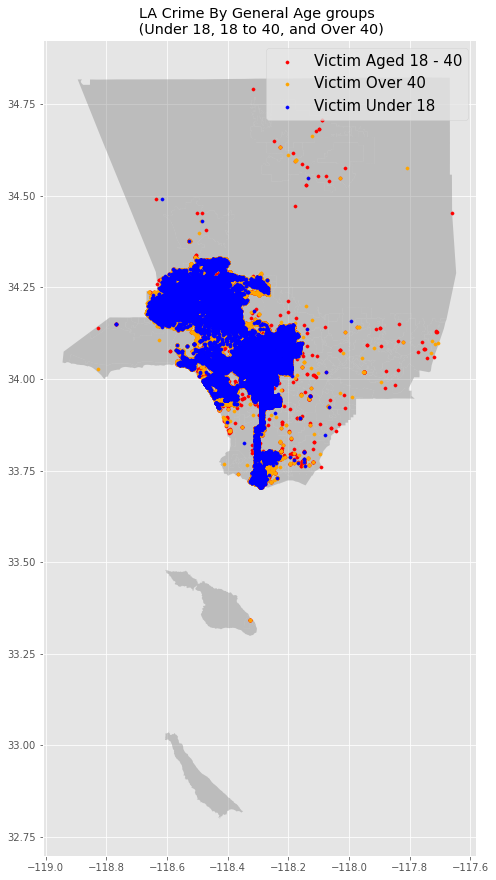

In [90]:
#Finally we are able to plot the data on the map
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
#starting with the largest group and decreasing to limit as much overlay as possible
geo_df[(geo_df['Vict Age']>=18) & (geo_df['Vict Age']<=40)].plot(ax = ax, markersize = 10, color = "red", marker = 'o', label = 'Victim Aged 18 - 40')
geo_df[geo_df['Vict Age']>40].plot(ax = ax, markersize = 10, color = "orange", marker = 'o', label = 'Victim Over 40')
geo_df[geo_df['Vict Age']<18].plot(ax = ax, markersize = 10, color = "blue", marker = 'o', label = 'Victim Under 18')
plt.title('LA Crime By General Age groups \n (Under 18, 18 to 40, and Over 40)')
plt.legend(prop={'size':15})

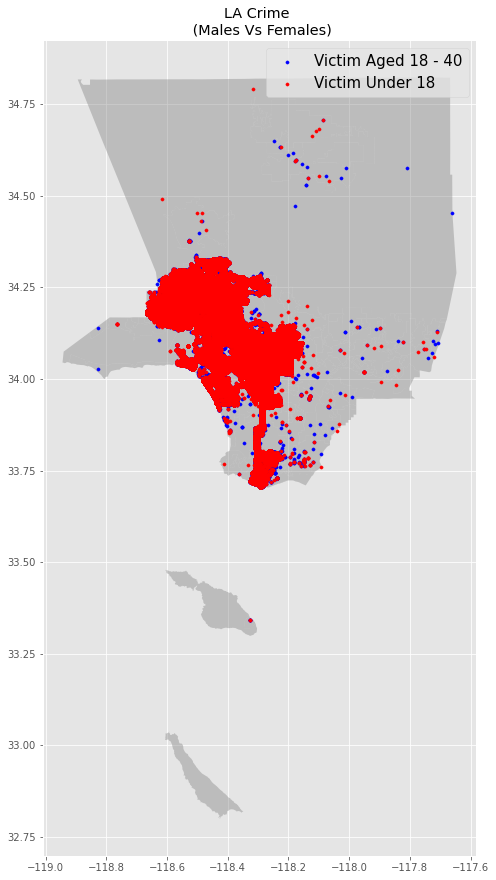

In [91]:
#Same plot, but looking to see if there are Sex specific areas that appear
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
geo_df[(geo_df['Vict Sex']=='M')].plot(ax = ax, markersize = 10, color = "blue", marker = 'o', label = 'Victim Aged 18 - 40')
geo_df[geo_df['Vict Sex']=='F'].plot(ax = ax, markersize = 10, color = "red", marker = 'o', label = 'Victim Under 18')
plt.title('LA Crime \n (Males Vs Females)')
plt.legend(prop={'size':15})

# New Features
#### [5 points] Are there other features that could be added to the data or created from existing features? Which ones?

In the future we would like to get more data from the reported and occurrence dates. By subtracting we would like to see how long it took to report the crime. We could also use these dates in conjunctions with APIs to determine sunset time and get an idea of if it was day or night for day and time of occurrence. There is an open Sunrise-Sunset API (https://sunrise-sunset.org/api) that would take in the latitide and longitude as well to get precise times for that geolocation.

Another API could be used to see if the crime was committed on a Holiday. To get the most commonly given off Holidays, we could use Calendarific (https://calendarific.com/api-documentation) as they give the option to filter by type of holiday and limit to national holidays. 

Some fields could just be extracted into new transformed fields. We could also denote crime occurrences by the day of the week they occured and whether it was on a weekend or not. Rather than working with the victim age as a continuous variable, it may be useful to group by demographics into age groups. Weapons not mentioned as present are represented as null in the Weapons Used Code field. This could be a single flag of Weapon Used that resolves to a true false. Again checking for nulls to get a charge count from the Crime code fields 1-4 could be put into a crime count field.

To make use of the MOCodes (Modus Operandi Codes) will take some processing to put them into a list and aggregate across the dataset. This could then be used to tally the most frequently used and dummy coding them as new columns that an incident either has or does not have. Rather than just adding potentially hundreds of new fields to each row.

The precincts are given and can be joined to other precinct datasets. They have a total area for the precinct (https://geohub.lacity.org/datasets/lapd-reporting-districts). We could find how many cars are assigned to the precint  in the Basic Car Plan (http://www.lapdonline.org/search_results/content_basic_view/6528)

# Exceptional Work
#### [10 points] You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

Below is the work that is above and beyond the requirements mentioned for Lab-1 which we want to claim as 'Exceptional Work':
- **Imputation on each column**: In addition to identifying the missing values, duplicate data, and outliers and providing methods to deal with the problems, we also have done the necessary imputations to provide a clean copy of the data which can now directly be used for modelling purposes.
- **Geospatial Map**: Plotting various attributes on a geospatial map was really challenging. We spent a significant amount of effort to come up with the maps.
- **TreeMaps**: We also had to spend a significant amount of effort to identify and present visualizations in the form a clean-looking TreeMap.